In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [4]:
df=pd.read_csv('Titanic_data.csv')
print(df)

   SURVIED  PCLASS     SEX   AGE  SIBSP  PARCH     FARE EMBARKED   CLASS  \
0        0       3    male  22.0      1      0   7.2500        S   Third   
1        1       1  female   3.0      1      0  71.2833        C   First   
2        1       3  female  26.0      0      0   7.9250        S   Third   
3        1       1  female  35.0      1      0  53.1000        S   First   
4        0       3    male  35.0      0      0   8.0500        S   Third   
5        0       3    male   NaN      0      0   8.4583        Q   Third   
6        0       1    male  54.0      0      0  51.8625        S   First   
7        0       3    male   2.0      3      1  21.0750        S   Third   
8        1       3  female  27.0      0      2  11.1333        S   Third   
9        1       2  female  14.0      1      0  30.0708        C  Second   

     WHO  ADULT-MALE DECK EMBARK_TOWN ALIVE  ALONE  
0    man        True  NaN  souhampton    no  False  
1  woman       False    C   cherbourg   yes  False  
2  w

In [5]:
df.shape

(10, 15)

In [6]:
df.describe()

,SURVIED,PCLASS,AGE,SIBSP,PARCH,FARE
count,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000
mean,0.500000,2.300000,24.222222,0.700000,0.300000,27.020820
std,0.527046,0.948683,16.521030,0.948683,0.674949,23.601938
min,0.000000,1.000000,2.000000,0.000000,0.000000,7.250000
25%,0.000000,1.250000,14.000000,0.000000,0.000000,8.152075
50%,0.500000,3.000000,26.000000,0.500000,0.000000,16.104150
75%,1.000000,3.000000,35.000000,1.000000,0.000000,46.414575
max,1.000000,3.000000,54.000000,3.000000,2.000000,71.283300


In [7]:
df.columns()

TypeError: 'Index' object is not callable

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SURVIED      10 non-null     int64  
 1   PCLASS       10 non-null     int64  
 2   SEX          10 non-null     object 
 3   AGE          9 non-null      float64
 4   SIBSP        10 non-null     int64  
 5   PARCH        10 non-null     int64  
 6   FARE         10 non-null     float64
 7   EMBARKED     10 non-null     object 
 8   CLASS        10 non-null     object 
 9   WHO          10 non-null     object 
 10  ADULT-MALE   10 non-null     bool   
 11  DECK         3 non-null      object 
 12  EMBARK_TOWN  10 non-null     object 
 13  ALIVE        10 non-null     object 
 14  ALONE        10 non-null     bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 1.2+ KB


In [9]:
df.isnull().sum()

SURVIED        0
PCLASS         0
SEX            0
AGE            1
SIBSP          0
PARCH          0
FARE           0
EMBARKED       0
CLASS          0
WHO            0
ADULT-MALE     0
DECK           7
EMBARK_TOWN    0
ALIVE          0
ALONE          0
dtype: int64

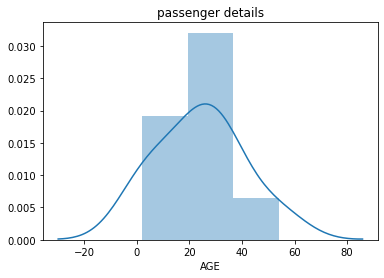

In [10]:
sn.distplot(df["AGE"])
plt.title("passenger details")
plt.show()

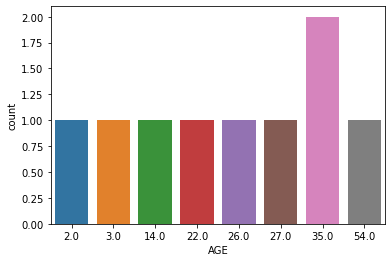

In [11]:
sn.countplot(x='AGE',data=df)
plt.show()

In [12]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

SURVIED        1.0000
PCLASS         1.7500
AGE           21.0000
SIBSP          1.0000
PARCH          0.0000
FARE          38.2625
ADULT-MALE     1.0000
ALONE          1.0000
dtype: float64


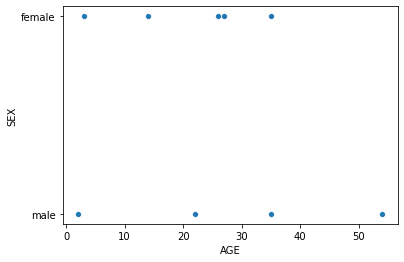

In [13]:
import seaborn as sns
sns.scatterplot(x="AGE",y="SEX", data=df)

In [14]:
df['SURVIED'].value_counts()

1    5
0    5
Name: SURVIED, dtype: int64

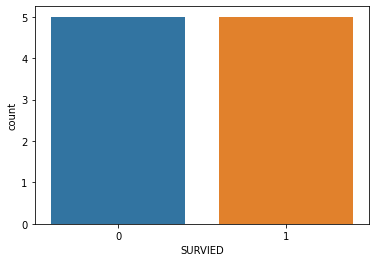

In [15]:
sns.countplot(df['SURVIED'])

In [16]:
cols=['WHO','SEX','CLASS','SIBSP','PARCH','EMBARKED']
n_rows=2
n_cols=3
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0, n_rows):
        for c in range(0, n_cols):
            
            
        i = r*n_cols + c
        ax=axs[r][c]
        sns.countplot(titanic[cols[1]],hue=titanic['SURVIVED'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='SURVIVED',loc='upper right')
        plt.tight_layout()
    

IndentationError: expected an indented block (<ipython-input-16-d26feadb55a5>, line 10)

In [17]:
df.groupby('SEX')[['SURVIED']].mean()

,SURVIED
SEX,
female,1
male,0


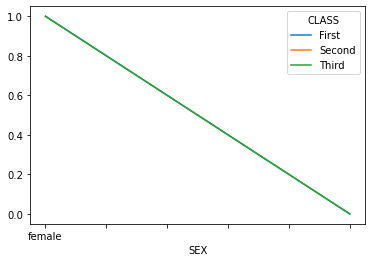

In [18]:
df.pivot_table('SURVIED',index='SEX',columns='CLASS').plot()

In [19]:
df.pivot_table('SURVIED',index='SEX',columns='CLASS')

CLASS,First,Second,Third
SEX,,,
female,1.0,1.0,1.0
male,0.0,NaN,0.0


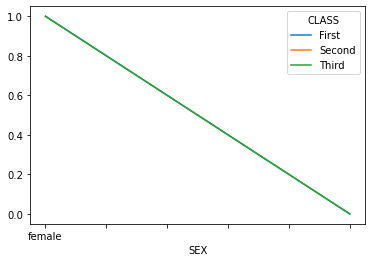

In [20]:
df.pivot_table('SURVIED',index='SEX',columns='CLASS').plot()

In [21]:
sns.barplot(x='CLASS',y='SURVIED',data=titanic)

NameError: name 'titanic' is not defined

In [35]:
age=pd.cut(df['AGE'],[0,18,80])
df.pivot_table('SURVIED',['SEX','AGE'],'CLASS')

CLASS        First  Second  Third
SEX    AGE                       
female 3.0     1.0     NaN    NaN
       14.0    NaN     1.0    NaN
       26.0    NaN     NaN    1.0
       27.0    NaN     NaN    1.0
       35.0    1.0     NaN    NaN
male   2.0     NaN     NaN    0.0
       22.0    NaN     NaN    0.0
       35.0    NaN     NaN    0.0
       54.0    0.0     NaN    NaN

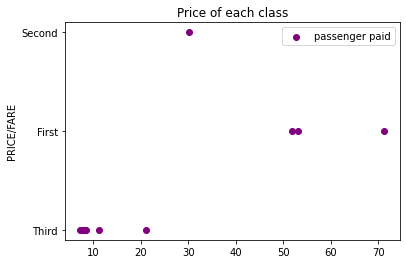

In [34]:
plt.scatter(df['FARE'],df['CLASS'],COLOR='purple',label='passenger paid')
plt.ylabel('CLASS')
plt.ylabel('PRICE/FARE')
plt.title('Price of each class')
plt.legend()
plt.show()

In [24]:
df.isna().sum()

SURVIED        0
PCLASS         0
SEX            0
AGE            1
SIBSP          0
PARCH          0
FARE           0
EMBARKED       0
CLASS          0
WHO            0
ADULT-MALE     0
DECK           7
EMBARK_TOWN    0
ALIVE          0
ALONE          0
dtype: int64

In [25]:
for val in df:
    print(df[val].value_counts())
    print()

1    5
0    5
Name: SURVIED, dtype: int64

3    6
1    3
2    1
Name: PCLASS, dtype: int64

female    5
male      5
Name: SEX, dtype: int64

35.0    2
14.0    1
27.0    1
2.0     1
54.0    1
26.0    1
3.0     1
22.0    1
Name: AGE, dtype: int64

0    5
1    4
3    1
Name: SIBSP, dtype: int64

0    8
2    1
1    1
Name: PARCH, dtype: int64

21.0750    1
30.0708    1
11.1333    1
71.2833    1
53.1000    1
7.9250     1
8.4583     1
8.0500     1
51.8625    1
7.2500     1
Name: FARE, dtype: int64

S    7
C    2
Q    1
Name: EMBARKED, dtype: int64

Third     6
First     3
Second    1
Name: CLASS, dtype: int64

woman    4
man      4
child    2
Name: WHO, dtype: int64

False    6
True     4
Name: ADULT-MALE, dtype: int64

C    2
E    1
Name: DECK, dtype: int64

Souhampton    5
souhampton    2
cherbourg     2
Queenstown    1
Name: EMBARK_TOWN, dtype: int64

no     5
yes    5
Name: ALIVE, dtype: int64

False    6
True     4
Name: ALONE, dtype: int64



In [26]:
#df=df.drop(['DECK','EMBARK_TOWN','ALIVE','CLASS','WHO','ALONE','ADULT_MALE'] axis=1)
df=df.drop['EMBARKED','AGE']

TypeError: 'method' object is not subscriptable

In [27]:
df.shape

(10, 15)

In [28]:
df.dtypes

SURVIED          int64
PCLASS           int64
SEX             object
AGE            float64
SIBSP            int64
PARCH            int64
FARE           float64
EMBARKED        object
CLASS           object
WHO             object
ADULT-MALE        bool
DECK            object
EMBARK_TOWN     object
ALIVE           object
ALONE             bool
dtype: object

In [30]:
from  sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1].values)
df.iloc[:,7]=labelencoder.fit_transform(df.iloc[:,7].values)


In [37]:
print(df['SEX'].unique())
print(df['EMBARKED'].unique())

['male' 'female']
[2 0 1]


In [39]:
df.dtypes

SURVIED          int64
PCLASS           int64
SEX             object
AGE            float64
SIBSP            int64
PARCH            int64
FARE           float64
EMBARKED         int32
CLASS           object
WHO             object
ADULT-MALE        bool
DECK            object
EMBARK_TOWN     object
ALIVE           object
ALONE             bool
dtype: object

In [41]:
X=df.iloc[:,1:8].values
Y=df.iloc[:,0].values

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

ValueError: could not convert string to float: 'male'

In [51]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(X_train, Y_train)
from sklearn.neighbours import KNeighborsClassifier
knn=KNeighborsClassfier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,Y_train)
from sklearn.svm import SVC
svc_lin=SVC(kernel='linear',random_state=0)
svc_lin.fit(X_train,Y_train)
from sklearn.svm import SVC
svc_rbf=SVC(kernel='rbf',random_state=0)
svc_rbf.fit(X_train,Y_train)
from sklearn.naive_bayes import GuassianNB
gauss=GuassianNB()
gauss.fit(X_train,Y_train)
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(X_train,Y_train)
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(X_train,Y_train)


ValueError: could not convert string to float: 'male'